# Intro
This notebook has two parts
- building statistical bi-gram model
- building Single layers bi-gram model

## Data preparation


In [33]:
with open('data/combined_english_names_cleaned.txt','r') as f:
    names = [x.strip().lower() for x in f.readlines()]
    

In [34]:
import torch
import matplotlib.pyplot as plt


chars = sorted(list(set(''.join(names))))

In [35]:
chars

['-',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'y',
 'z']

In [36]:
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['-'] = 1
stoi['.'] = 0

itos = {s:i for i,s in stoi.items()}
stoi


{'-': 1,
 'a': 2,
 'b': 3,
 'c': 4,
 'd': 5,
 'e': 6,
 'f': 7,
 'g': 8,
 'h': 9,
 'i': 10,
 'j': 11,
 'k': 12,
 'l': 13,
 'm': 14,
 'n': 15,
 'o': 16,
 'p': 17,
 'q': 18,
 'r': 19,
 's': 20,
 't': 21,
 'u': 22,
 'v': 23,
 'w': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [37]:
itos

{1: '-',
 2: 'a',
 3: 'b',
 4: 'c',
 5: 'd',
 6: 'e',
 7: 'f',
 8: 'g',
 9: 'h',
 10: 'i',
 11: 'j',
 12: 'k',
 13: 'l',
 14: 'm',
 15: 'n',
 16: 'o',
 17: 'p',
 18: 'q',
 19: 'r',
 20: 's',
 21: 't',
 22: 'u',
 23: 'v',
 24: 'w',
 25: 'y',
 26: 'z',
 0: '.'}

## Statistical Bi-gram 

In [38]:
bi_grams = torch.zeros((27,27), dtype= torch.int32)

for name in names:
    chrs = ['.'] + list(name) + ['.']

    for c1,c2 in zip(chrs, chrs[1:]):
        bi_grams[stoi[c1], stoi[c2]] +=1

In [39]:
bi_grams

tensor([[    0,     0, 24803,  2653,    17,  1631,    23,   966,   476,  2242,
          2059,  1299,  1404,   456,  3930,  1405,    10,     8,  1201,  1444,
          3829,  1318,    70,     3,   545,   171,   850],
        [    0,     0,   724,    79,     7,    59,   165,    40,   126,   252,
            28,    74,   166,    46,   243,    52,     4,     0,    73,   287,
           229,    38,    74,     3,    77,    16,    24],
        [ 3367,   372,  3325,  9029,    23,  4220,    79,  1525,   182, 10234,
         11746,  1401,  1198, 20076,  7437,  8107,  1968,    10,   774,  6581,
          2406,  2168,   139,    15,   519,   416,  1709],
        [ 1384,     2,  3954,    78,     0,  5100,    72,    11,    47,   362,
          2137,   132,   184,   472,    14,   244,  1493,     0,   135,   696,
           498,   329,    56,     0,    76,     3,    69],
        [    2,     0,    32,     0,     0,     0,     2,     0,     0,    17,
             3,     0,    18,     0,     0,     0,   

(-0.5, 26.5, 26.5, -0.5)

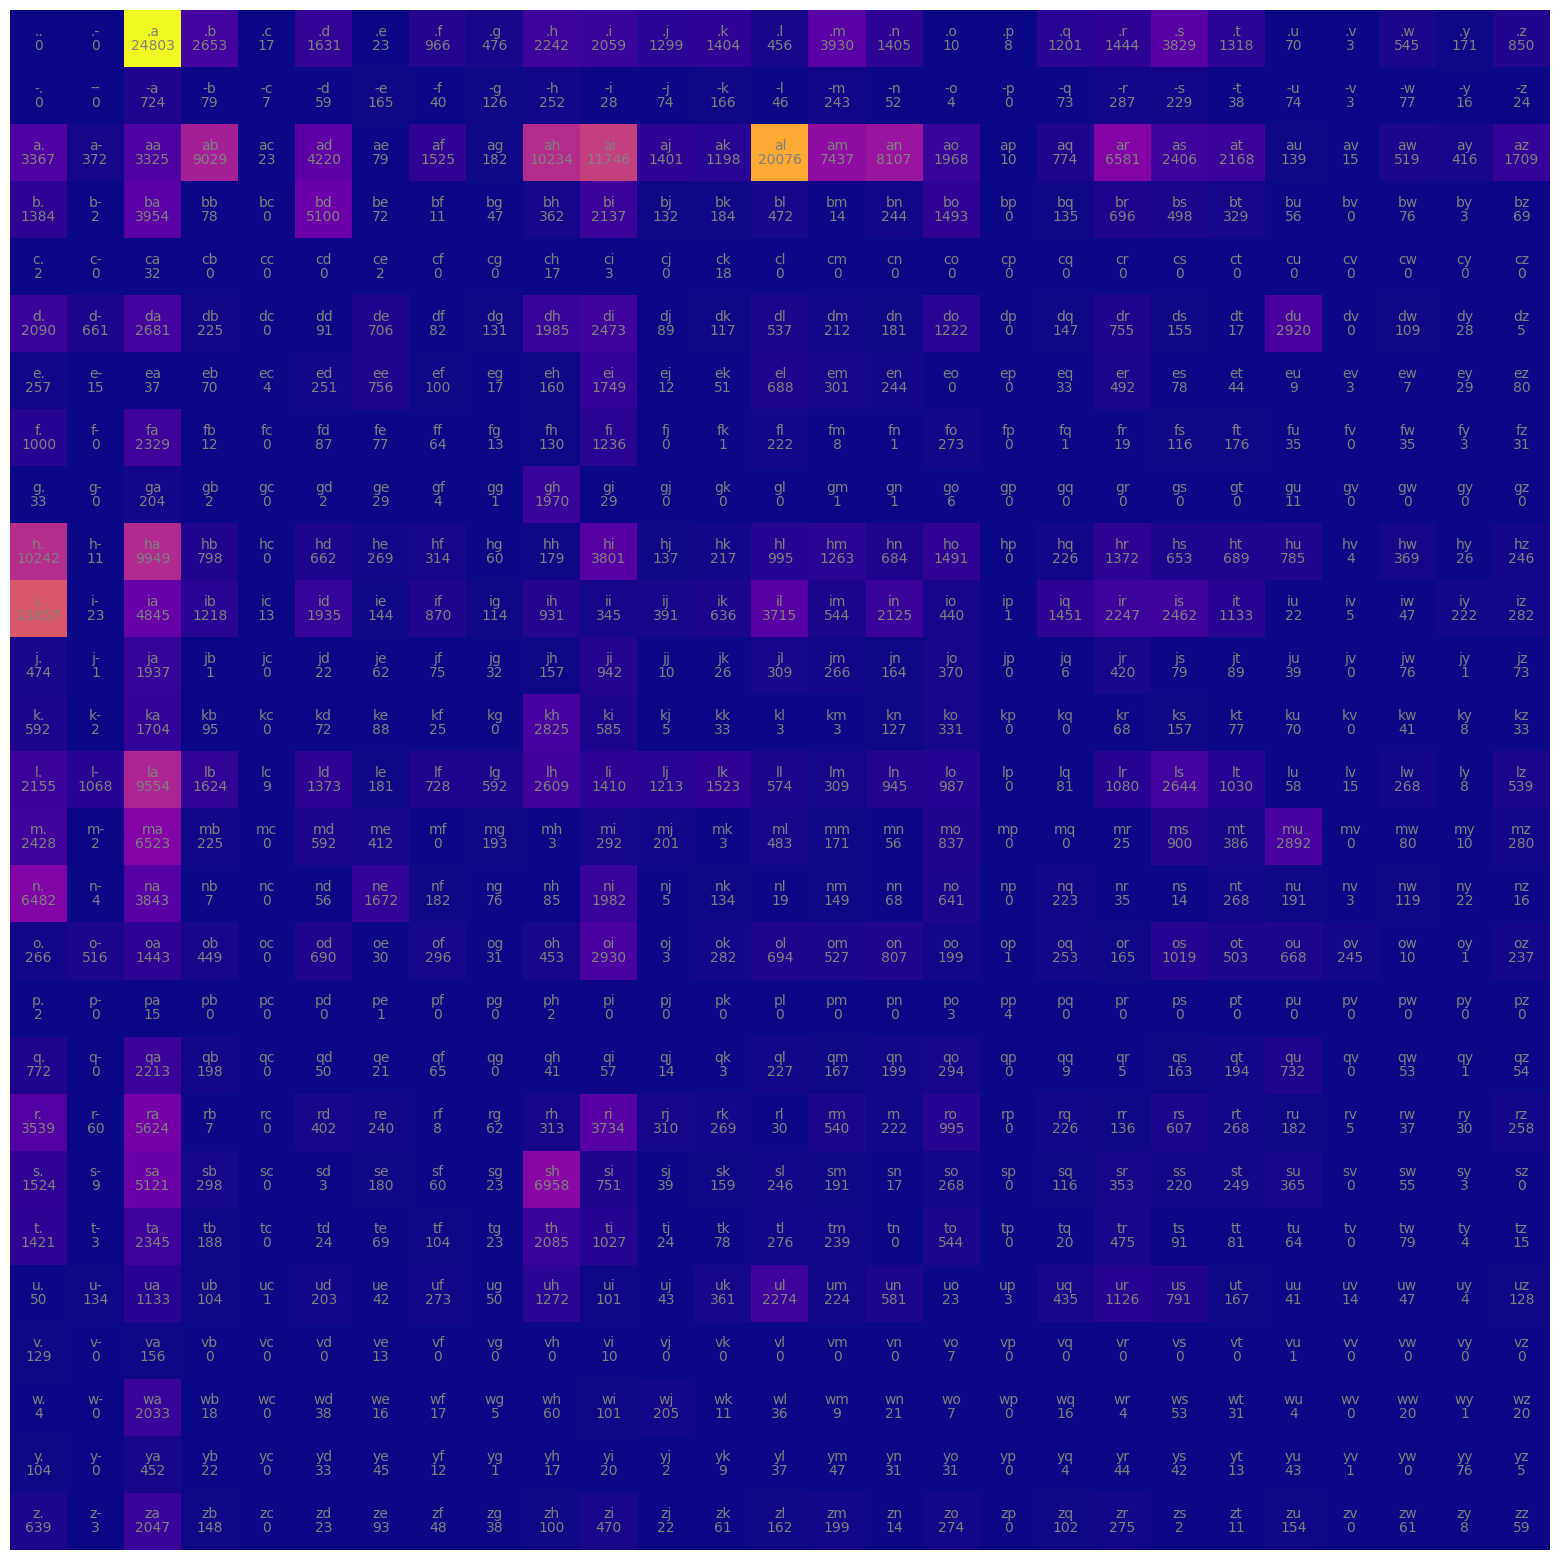

In [40]:
plt.figure(figsize=(20,20))

plt.imshow(bi_grams, cmap='plasma')
for i in range(27):
    for j in range(27):
        c1, c2 = itos[i], itos[j]

        plt.text(j,i,c1+c2, ha='center', va='bottom', color='gray')
        plt.text(j,i, bi_grams[i,j].item(), ha='center', va='top', color='gray')
        
    
plt.axis('off')

In [41]:
# p = [bi_grams[i] / torch.sum(bi_grams[i]) for i in range(bi_grams.shape[0])] 


## we add one for model smoothing, so we don't get infinity for bi-grams  that has 0 occurrence 
p = (bi_grams+1).float()
# convert counts into probabilities
p = p/torch.sum(p, axis=1,keepdim=True)
for  i in range(bi_grams.shape[0]):
    # assert the row sum is one
    assert abs((torch.sum(p[i]).item() - 1.0)) < 1e-6

In [42]:
def generate_word():
    w = ''
    index = stoi['.']
    while True:
        sampler = torch.multinomial(p[index],1).item()
        index = sampler

        if sampler == 0:
            break
        
        w+= itos[sampler]

    return w

In [43]:
def generate_random():
    w = ''
    index = stoi['.']
    while True:
        # sampler = torch.multinomial(p[index],1).item()
        sampler = torch.randint(0,27,(1,)).item()
        index = sampler

        if sampler == 0:
            break
        
        w+= itos[sampler]

    return w

In [44]:

## GENERATING WORDS
from tqdm import tqdm
g = torch.Generator().manual_seed(77)
WORD_LENGTH = 5
l1 = l2 = 0

N = 1_000_0

for i in tqdm(range(N)):
    # print(generate_word(), generate_random())
    l1 += len(generate_word())
    l2 += len(generate_random())

print(f' Avg Length of generated words is: {l1/N}')
print(f' Avg Length of random words is: {l2/N}')





100%|██████████| 10000/10000 [00:02<00:00, 3576.00it/s]

 Avg Length of generated words is: 7.3559
 Avg Length of random words is: 26.0953


In [45]:
avg_names_len = 0

for x in names:
    avg_names_len += len(x)
avg_names_len /= len(names)
 
print(f'average length of names in dataset is:{avg_names_len}')

average length of names in dataset is:7.315376895840039


### Observation
We can see here, that the avg length of generated words using bi-gram model is the same as the avg length of the words in the dataset.

And the average length of the words generated randomly is the same as number of letters in the alphabet (26)

In [46]:
for i in range(5):
    print(generate_word())

amala
ani
ai
abdouri
abdlala


In [47]:
## calculating avg log liklihood of the dataset

nll = 0
n = 0
for name in names:
    chrs = ['.'] + list(name) + ['.']

    for c1,c2 in zip(chrs, chrs[1:]):
        p[0,1]
        prob = p[stoi[c1], stoi[c2]]
        logprob= torch.log(prob)
        nll += logprob
        n+=1
        # print(f'{c1}{c2}   {prob:.4f}  {logprob:.4f}')

nll *= -1

print(f'{nll=}')
print(f'avg ll=  {nll/n}')

nll=tensor(1008982.7500)
avg ll=  2.2975287437438965


## Building Bi-Gram NN using one hot vector encoding

In [48]:
x,y = [], []
 
for name in names[:1]:
    chrs = ['.'] + list(name) + ['.']
    for c1,c2 in zip(chrs, chrs[1:]):
        x.append(stoi[c1])
        y.append(stoi[c2])


x = torch.tensor(x)
y = torch.tensor(y)

# print(x,y)


## Turn to one hot vector 
x_oh = torch.nn.functional.one_hot(x,27).float()
# y = torch.nn.functional.one_hot(x,27)


print(x.shape)


torch.Size([12])


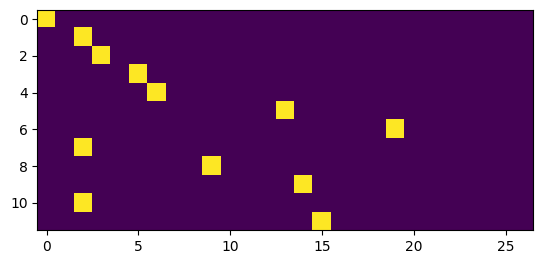

In [49]:
plt.imshow(x_oh)

In [50]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)
x = torch.tensor(x)
y = torch.tensor(y)



/tmp/ipykernel_4042731/1811889316.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/tmp/ipykernel_4042731/1811889316.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y)


In [51]:
## Turn to one hot vector 
x_oh = torch.nn.functional.one_hot(x,27).float()

## log counts
logits = x_oh @ W

counts = logits.exp()

probs = counts / counts.sum(1, keepdims=True)


In [52]:
probs.shape

torch.Size([12, 27])

In [53]:
nlls = torch.zeros(9)
for i in range(9):
  # i-th bigram:
  xi = x[i].item() # input character index
  yi= y[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[xi]}{itos[yi]} (indexes {xi},{yi})')
  print('input to the neural net:', xi)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', yi)
  p = probs[i, yi]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .a (indexes 0,2)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 2
probability assigned by the net to the the correct character: 0.01231403835117817
log likelihood: -4.397015571594238
negative log likelihood: 4.397015571594238
--------
bigram example 2: ab (indexes 2,3)
input to the neural net: 2
output probabilities from the neural net: tensor([0.0249, 0.0079, 0.0314, 0.0344, 0.0086, 0.0098, 0.0246, 0.0174, 0.0076,
        0.0046, 0.0548, 0.0089, 0.1230, 0.1814, 0.0091, 0.0369, 0.0398, 0.0977,
        0.0075, 0.0110, 0.0104, 0.1236, 0.0256, 0.0579, 0.0115, 0.0232, 0.0067])
label (actual next character): 3
probability assigned by the net to the the correct character: 0.03

In [54]:
x,y = [], []
 
for name in names:
    chrs = ['.'] + list(name) + ['.']
    for c1,c2 in zip(chrs, chrs[1:]):
        x.append(stoi[c1])
        y.append(stoi[c2])


print(f' Number of examples is  {len(x)}')
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)
x = torch.tensor(x)
y = torch.tensor(y)

lr = 100

 Number of examples is  439160


In [55]:
## OPTIMIZATION ########


def train_epoch():

    ## Forward 
    x_oh = torch.nn.functional.one_hot(x,27).float()
    logits = x_oh @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[ torch.arange(probs.shape[0]) , y].log().mean()
    loss2 = -probs[ torch.arange(probs.shape[0]) , y].log()

    # print(loss.item())

    ## Backwward
    W.grad = None
    loss.backward()
    W.data+= -lr*W.grad

    return loss.item()

In [56]:
train_epoch()

3.6701314449310303

In [57]:
def generate_name():

    w = ''
    last_ch = 0
    while True:

        x_vec = torch.nn.functional.one_hot(torch.tensor([last_ch]),27).float()

        logits = x_vec @ W
        counts = logits.exp() # counts, equivalent to N
        p = counts / counts.sum(1, keepdims=True)
        # p = p.T

        next_ch = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        last_ch = next_ch
        w += itos[next_ch]

        if next_ch == 0:
            break

    return w

In [58]:
l = 0
for i in range(500):
    l = train_epoch()

print(l)


2.5386388301849365


In [59]:

for i in range(10):
    print(generate_name())

alsailaljr.
algalzbdh.
al.
almequn.
ardab.
alalkan.
ai.
aymalkbabi.
a.
alhoi.


In [60]:
N = 1_000_0


l1 = 0
for i in tqdm(range(N)):
    # print(generate_word(), generate_random())
    l1 += len(generate_name())

print(l1/N)


100%|██████████| 10000/10000 [00:03<00:00, 2734.22it/s]

7.7441


### Observations

we see that we still got the same avg length  which is 7